# Task - data preparation, basic statistical analysis

You will try to process a very similar dataset as in the lecture. This time the house prices are from Portland and are relatively recent.

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

To make things easier, only some columns were selected from the original dataset and the number of records was also significantly reduced.

!!! For this reason, the subset created may not statistically match the original dataset.

A bonus task is to process the original dataset.

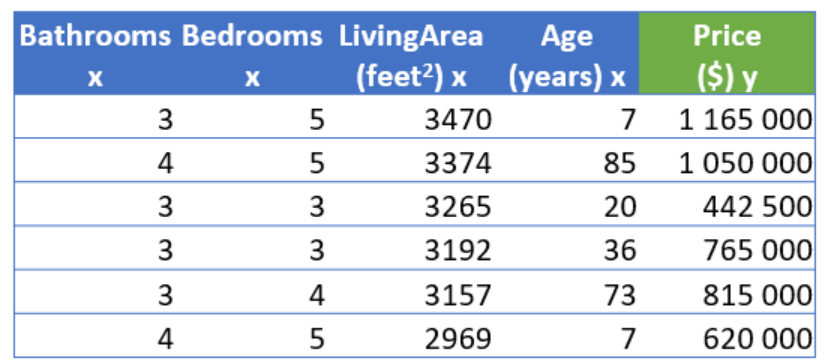

# Task

- Perform a statistical analysis of the data
- Visualize the data
- Select appropriate variables for the linear model
- Standardize the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

data = pd.read_csv("../dataset/portland_filtered.csv", sep=';')

## Basic data characteristics
- data preview
- display of basic statistics (average, minimum, maximum, ...)
- checking NaN values

In [3]:
data.head()


,bathrooms,bedrooms,livingArea,age,price
0,3,5,3470,7,1165000
1,4,5,3374,85,1050000
2,3,3,3265,20,442500
3,3,3,3192,36,765000
4,3,4,3157,73,815000


In [4]:
data.describe()


,bathrooms,bedrooms,livingArea,age,price
count,100.000000,100.000000,100.000000,100.00000,1.000000e+02
mean,2.380000,3.260000,1974.080000,49.88000,5.196074e+05
std,0.838228,0.860115,663.629851,32.77973,1.722241e+05
min,1.000000,1.000000,766.000000,3.00000,1.650000e+05
25%,2.000000,3.000000,1530.000000,20.00000,4.125000e+05
50%,2.000000,3.000000,1859.000000,47.50000,5.000000e+05
75%,3.000000,4.000000,2490.250000,75.25000,5.995312e+05
max,5.000000,6.000000,3470.000000,114.00000,1.165000e+06


In [5]:
data.isna().sum()


bathrooms     0
bedrooms      0
livingArea    0
age           0
price         0
dtype: int64

## Data distribution
- charts with data distribution
- boxplot charts
- describe what the data is (skewed values, ...)

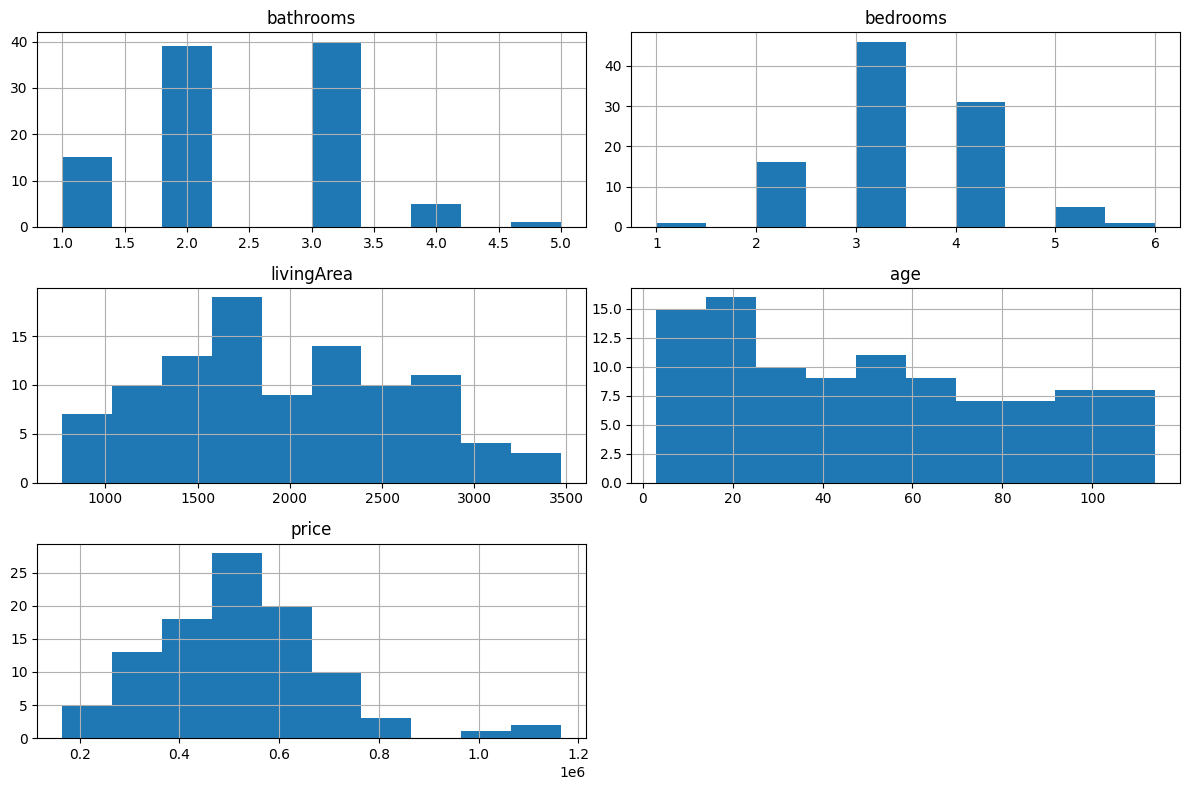

In [6]:
import matplotlib.pyplot as plt

data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()



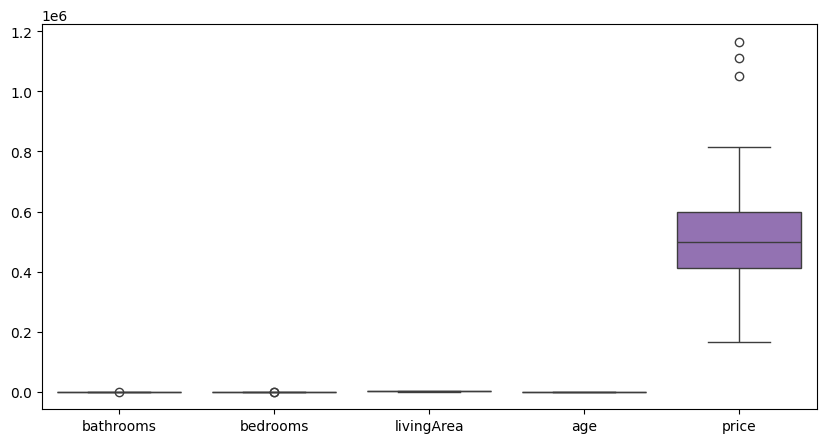

In [7]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data)
plt.show()


Living area and price are right-skewed

Price contains high-value outliers

Bedrooms and bathrooms are discrete and less spread

## Relationships between data
- pairplot
- correlation table
- Determine which columns are linearly dependent, suitable for explaining price

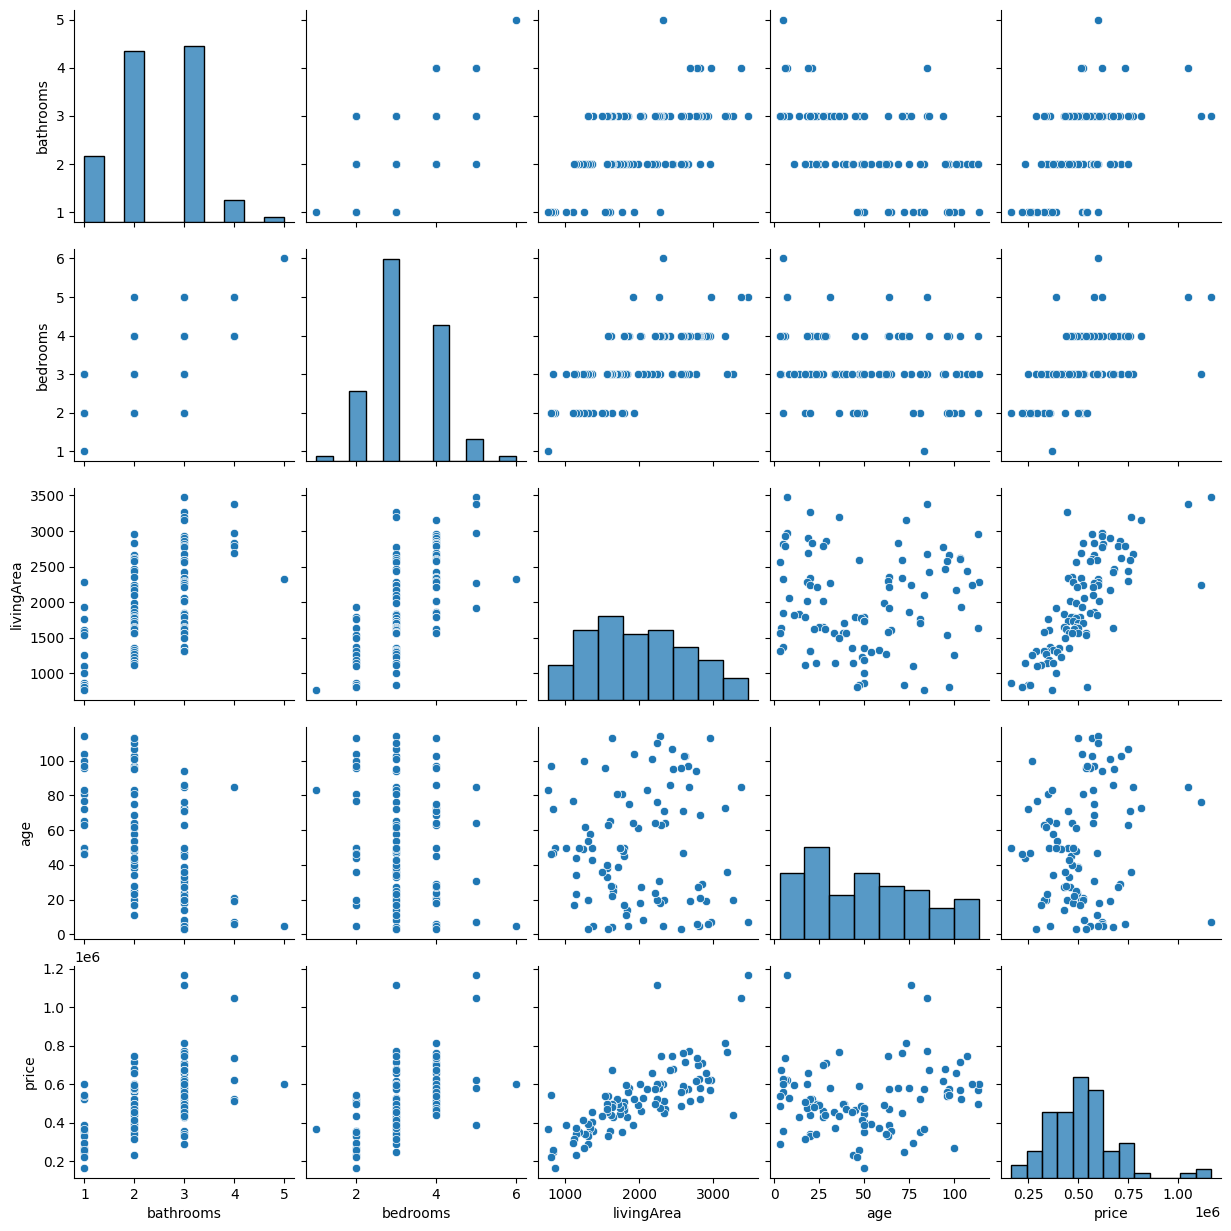

In [8]:
import seaborn as sns

sns.pairplot(data)
plt.show()


In [9]:
data.corr()


,bathrooms,bedrooms,livingArea,age,price
bathrooms,1.000000,0.618132,0.566558,-0.536517,0.463856
bedrooms,0.618132,1.000000,0.641684,-0.224947,0.498934
livingArea,0.566558,0.641684,1.000000,0.019381,0.759973
age,-0.536517,-0.224947,0.019381,1.000000,0.114328
price,0.463856,0.498934,0.759973,0.114328,1.000000


bathrooms, bedrooms, livingArea, age

## Data standardization

Each function has a different mean, standard deviation.

Standardization center and scale function.

Reasons:
* to prevent some functions from dominating the model.
* can help machine learning models converge faster
* can facilitate interpretation of machine learning model coefficients

Calculation:
* x_new = (x - mean) / standard_deviation
* mean = sum of (x) / number of (x)
* standard_deviation = sqrt( sum ( (x - mean)^2 ) / count (x))

- perform the standardization of the columns used for the linear regression
- show the distribution of the original and standardised data
*** Translated with www.DeepL.com/Translator (free version) ***



In [10]:
features = ["bathrooms", "bedrooms", "livingArea", "age"]


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_standardized = data.copy()
data_standardized[features] = scaler.fit_transform(data[features])


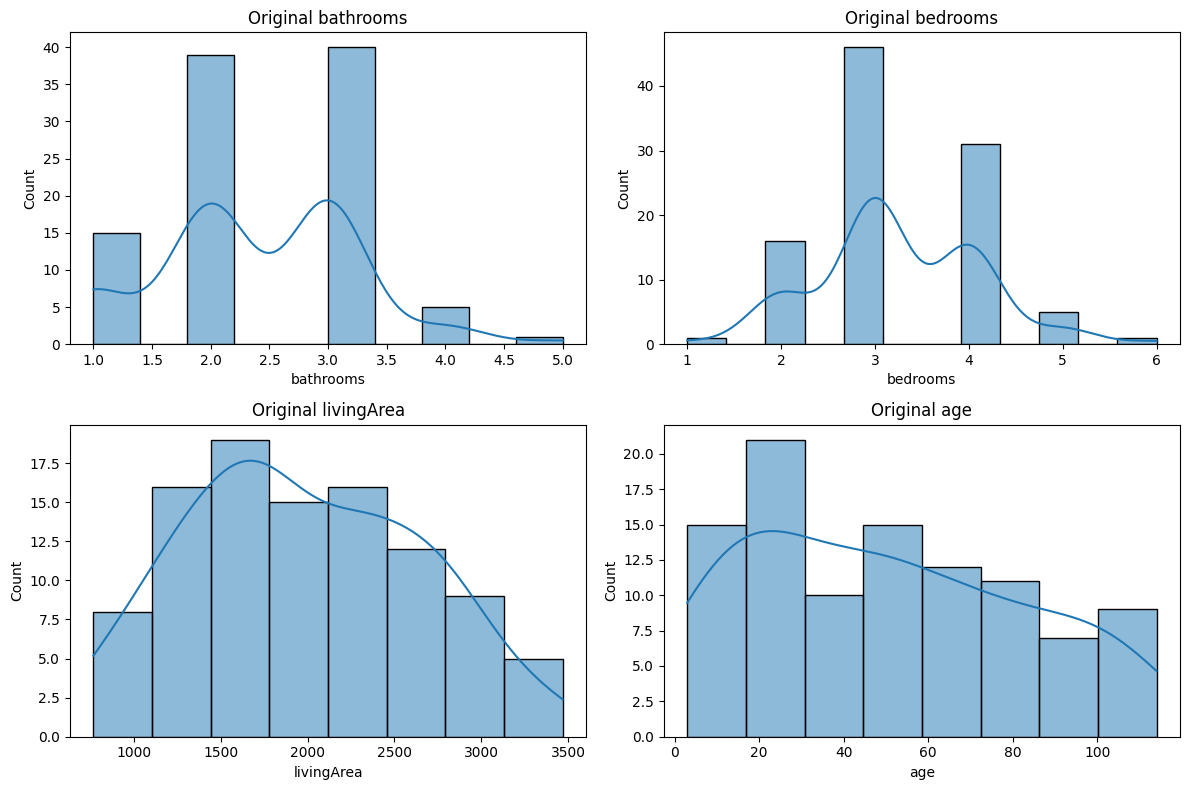

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(features):
    sns.histplot(data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f"Original {col}")

plt.tight_layout()
plt.show()


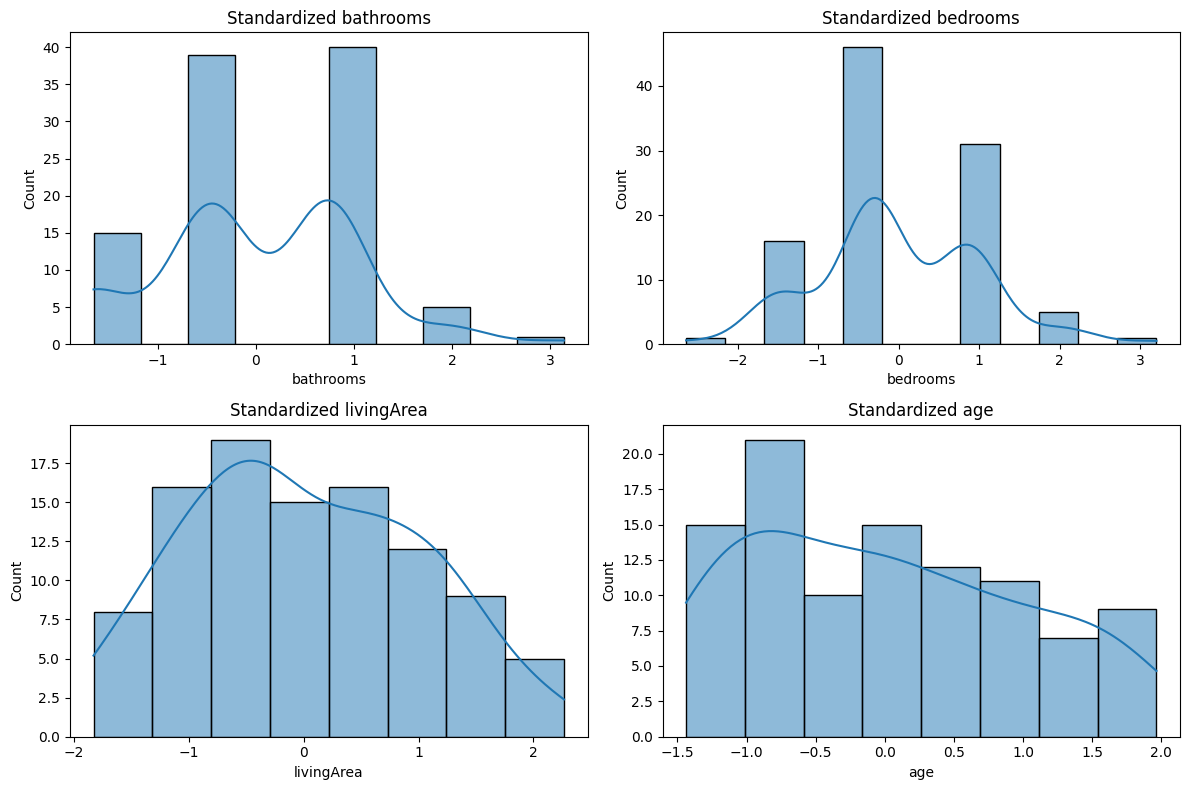

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(features):
    sns.histplot(data_standardized[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f"Standardized {col}")

plt.tight_layout()
plt.show()
